# Naive Bayes

In [1]:
from sklearn import datasets

wine = datasets.load_wine()

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine.data,
                                                   wine.target,
                                                   test_size=0.3,
                                                   random_state=109)

In [3]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

In [4]:
from sklearn import metrics

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9074074074074074


# Decision Tree

In [5]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

In [6]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
            'pedigree', 'age', 'label']

pima = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv',
                   header=None, names=col_names)

In [7]:
numer = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp',
        'pedigree', 'label']

for col in numer:
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

pima.dropna(inplace=True)

In [8]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age',
               'glucose', 'bp', 'pedigree']

x = pima[feature_cols]
y = pima.label

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                   random_state=1)

In [10]:
clf = DecisionTreeClassifier().fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [12]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7056277056277056


# Random Forest

In [13]:
from sklearn import datasets

iris = datasets.load_iris()

In [14]:
data = pd.DataFrame({
    'sepal length' : iris.data[:,0],
    'sepal width' : iris.data[:,1],
    'petal length' : iris.data[:,2],
    'petal width' : iris.data[:,3],
    'species' : iris.target
}) 

In [15]:
x = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

x_train, x_test, y_train, y_test = train_test_split(
                                     x, y, test_size=0.3)

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [17]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9777777777777777


#### Finding Important Features

In [18]:
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.419219
petal length (cm)    0.405497
sepal length (cm)    0.130618
sepal width (cm)     0.044666
dtype: float64

No handles with labels found to put in legend.


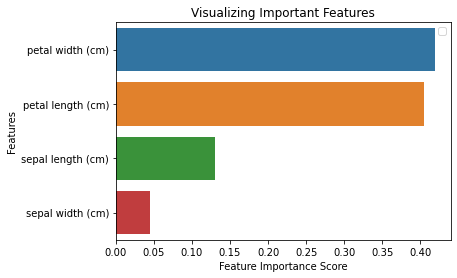

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

# SMV

In [23]:
cancer = datasets.load_breast_cancer()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   test_size=0.3,
                                                   random_state=109)

In [26]:
from sklearn import svm

clf = svm.SVC(kernel='linear').fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [27]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9649122807017544
